1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from scipy import stats, integrate
import seaborn as sns
import pandas as pd

0.9550000000000001


C:\Users\angel\AppData\Local\Temp\ipykernel_15240\1070120974.py:31: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  kde /= (integrate.trapz(kde,p))   # normalization of KDE


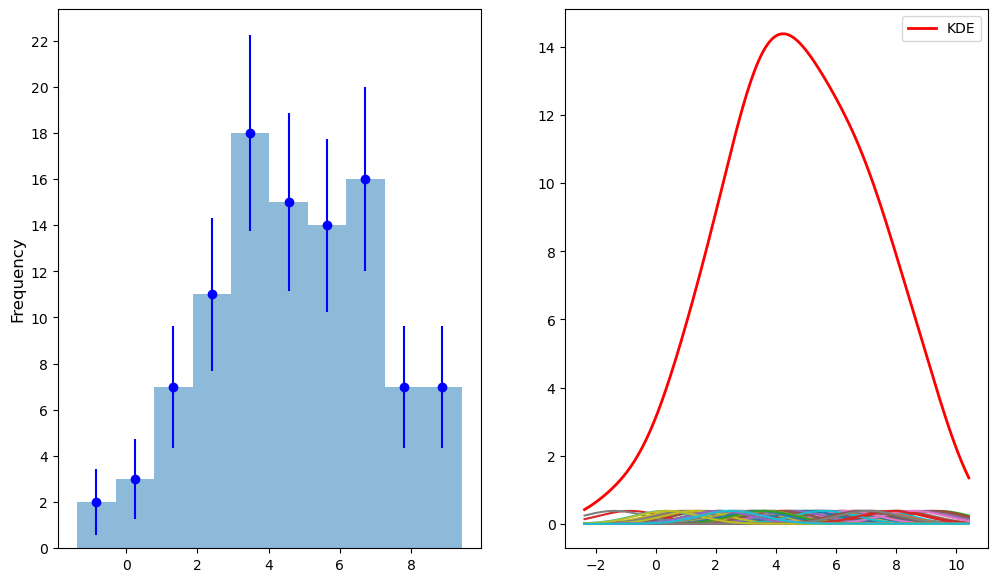

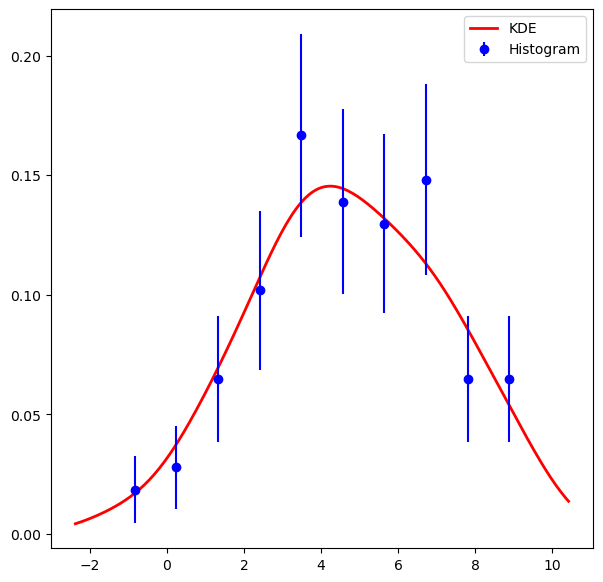

In [ ]:
N=100
mn=5
std=2.5

x=np.random.normal(mn, std, N)


fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
counts, bins, _ = ax1.hist(x, bins=N//10, alpha = 0.5)      # perform histogram


ax1.set_ylabel("Frequency", fontsize=12)
ax1.yaxis.set_major_locator(MultipleLocator(N//50))
ax1.errorbar(bins[:-1]+abs(bins[0]-bins[1])/2, counts, yerr=((counts)**(1/2)), marker='o', linestyle='', color='b')     #prints histogram as datapoints with error

sstd=1.06*std*N**(-1/5)
p=np.linspace(min(x) - 1, max(x) + 1, 200)
kde = np.zeros_like(p)  

for i in x:
    g=stats.norm.pdf(p, i, sstd)
    ax2.plot(p, g)
    kde += g


ax2.plot(p, kde, color='red', lw=2, label='KDE')
ax2.legend()



kde /= (integrate.trapz(kde,p))   # normalization of KDE


fig2, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
ax3.plot(p, kde, color='red', lw=2, label='KDE')
bin_width = bins[1] - bins[0]
counts_n = counts / (sum(counts) * bin_width)  # normalization of histogram

ax3.errorbar(bins[:-1]+abs(bins[0]-bins[1])/2, counts_n, yerr=((counts)**(1/2)/sum(counts)), marker='o', linestyle='', color='b', label='Histogram')    
ax3.legend()


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

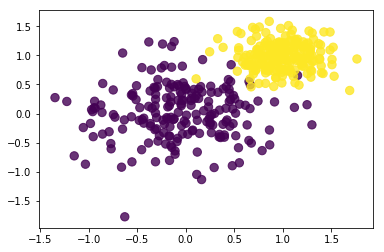

In [44]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

C:\Users\angel\AppData\Local\Temp\ipykernel_15240\869902731.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.iloc[0:NA, 2]=np.array(['A'] * NA)


           x         y cat
0   4.529942  8.328639   A
1   3.591664  0.735028   A
2   1.852903  5.557646   A
3   1.787222  5.015367   A
4  -1.974998  5.649956   A
..       ...       ...  ..
95  3.342845  6.426580   B
96  5.119041  4.913251   B
97  4.438727  2.770031   B
98  5.079601  4.791984   B
99  4.758756  5.892467   B

[100 rows x 3 columns]


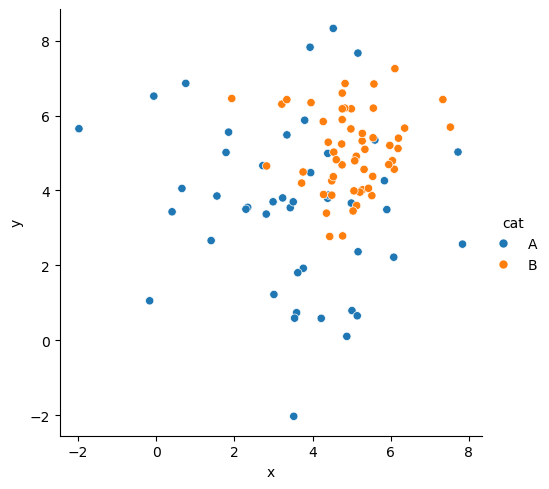

In [ ]:
N=100           #number of data
#data=np.zeros((N, 3))       #each data point has coordinates x, y and the label for category
NA=45
NB=N-NA
mA=3.5
stdA=2
mB=5
stdB=1
data=pd.DataFrame(np.zeros((N,3)),columns=['x', 'y', 'cat'])
data.iloc[0:NA,0:2]=np.random.normal(mA, stdA, (NA, 2))
data.iloc[0:NA, 2]=np.array(['A'] * NA)
data.iloc[NA:,0:2]=np.random.normal(mB, stdB, (NB, 2))
data.iloc[NA:, 2]=np.array(['B'] * NB)
sns.relplot(x="x", y="y", hue="cat", data=data);

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]


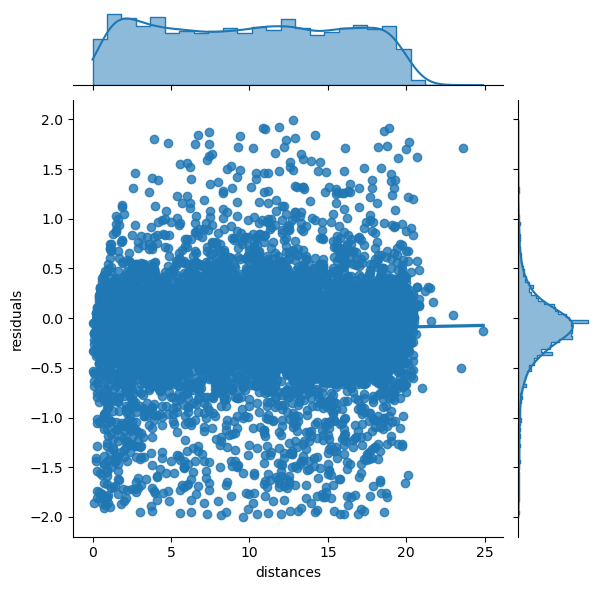

In [99]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

dat=np.load("residuals_261.npy", allow_pickle=True)
df=pd.DataFrame(dat.item())

df1=df[abs(df['residuals'])<2]
print(df1)
stats.linregress(df1['distances'], df1['residuals'])
sns.jointplot(df1, x='distances',y='residuals', kind='reg', marginal_kws=dict(element='step'))

#counts, binsx, _ = plt.hist(df1['distances'], bins=10, range=np.arange(0,21))      